<h1> Geometric Operations and Other Mathematical Tools with OpenCV </h1>


# Objectives
<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling  </li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


In [1]:
# download the images
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2024-02-02 13:23:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K   182KB/s    in 2.5s    

2024-02-02 13:23:15 (182 KB/s) - ‘lenna.png’ saved [473831/473831]

--2024-02-02 13:23:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-course

In [2]:
# import the libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# helper function to plot images side by side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Geometric Transformation

### Scaling

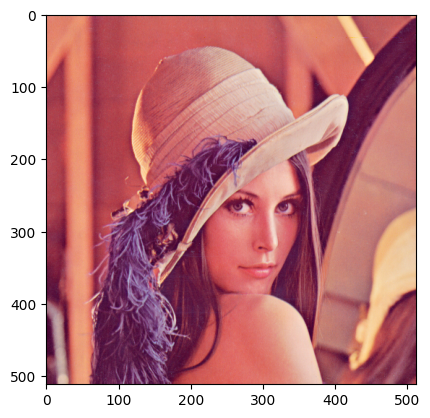

In [4]:
# load the image
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

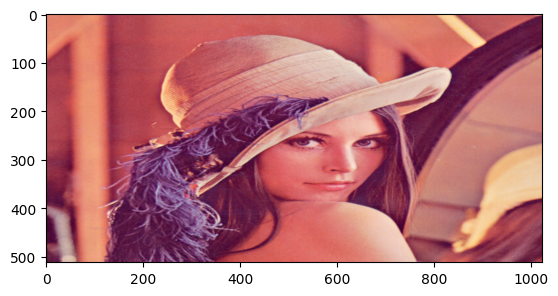

In [5]:
# expand the width of the image
new_image = cv2.resize(image, None, fx = 2, fy = 1, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

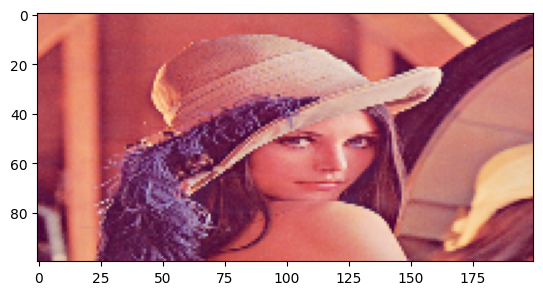

old image shape: (512, 512, 3) new image shape: (100, 200, 3)


In [8]:
# you can also resize the image by specifiying the rows and colomns
rows = 200
columns = 100
new_image = cv2.resize(image,(rows, columns), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

### Translation

In [9]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

We use the function warpAffine from the cv2 module. The first input parater is an image array, the second input parameter is the transformation matrix M, and the final input paramter is the length and width of the output image  (𝑐𝑜𝑙𝑠,𝑟𝑜𝑤𝑠)
 :

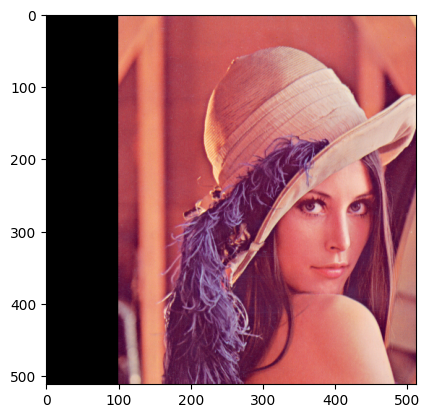

In [15]:
rows, columns, _ = image.shape
new_image = cv2.warpAffine(image, M, (columns, rows))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

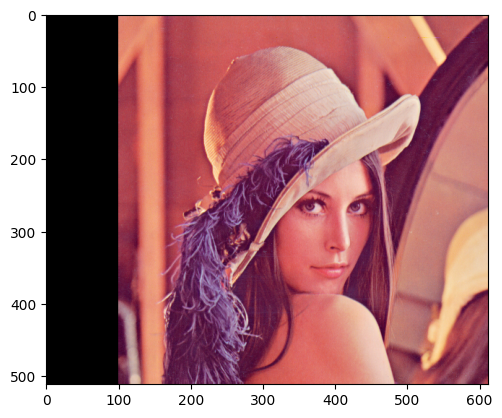

In [16]:
# if you don't want part of the original image to be cut off
new_image = cv2.warpAffine(image, M, (columns + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

### Rotation

center: Center of the rotation in the source image. We will only use the center of the image.

angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).

scale: Isotropic scale factor, in this course the value will be one.

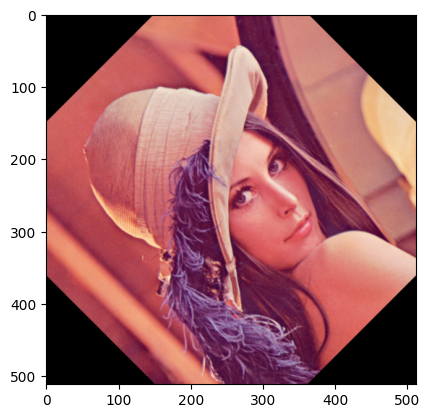

In [20]:
theta = 45
M = cv2.getRotationMatrix2D(center = (columns // 2-1, rows // 2-1), angle = theta, scale = 1)
new_image = cv2.warpAffine(image, M, (columns,rows))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Mathematical Operations

### Array operations

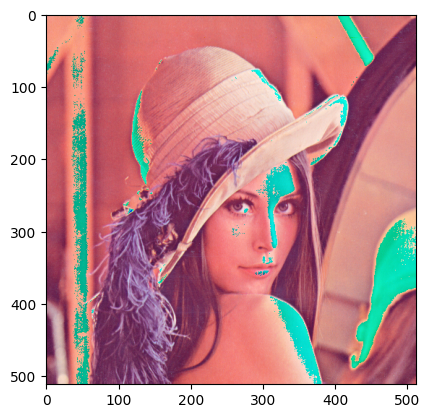

In [21]:
# increase contrast
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

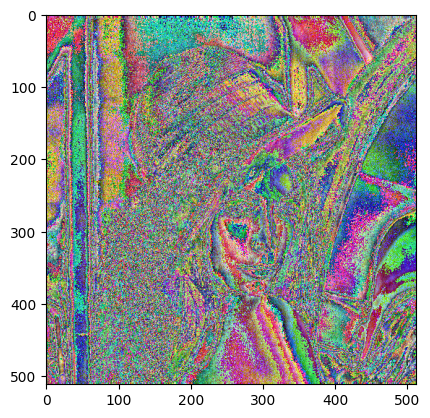

In [22]:
# increase pixel size
new_image = image * 10

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()